# Experiments simulation 1

## Imports

In [3]:
import os, sys, random
import polars as pl
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from BigEDA.descriptive import outliers_table
from BigEDA.plots import boxplot_matrix, histogram_matrix, barplot_matrix
from FastKmedoids.plots import clustering_MDS_plot_multiple_methods
sns.set_style('whitegrid')

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', 'src')
config_path = os.path.join(current_path, '..', 'config')
sys.path.append(src_path)
sys.path.append(config_path)
from simulations_utils import get_simulation_1
from experiments_utils import (make_experiment_1, 
                               make_experiment_3, 
                               make_experiment_4,
                               get_pivoted_results, get_avg_results,
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables,
                               avg_results_to_dfs,
                               get_GGower_distances_names)
from config_experiment_1_simulation_1 import get_config as get_config_exp_1_sim_1
from config_experiment_3_simulation_1 import get_config as get_config_exp_3_sim_1
from config_experiment_4_simulation_1 import get_config as get_config_exp_4_sim_1


## Data Simulation

35k rows, outlier contamination

In [27]:
X, y, outliers_idx = get_simulation_1(random_state=123, return_outlier_idx=True)

In [28]:
# polars conversion for data exploration
X_pl = pl.from_pandas(X)

## Data Exploration

In [29]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-2.651313,0.425178,-4.840969,4.436158,0,0,0,2
1,-32.573721,-26.135065,-0.516458,-1.903982,0,1,0,0
2,6.366665,2.813932,-2.505519,-7.371732,0,1,0,0
3,-5.000105,-7.485500,3.060407,4.966358,0,1,2,1
4,-4.931669,-6.980633,2.779526,-2.976350,1,1,2,2


In [30]:
# Proportion of individuals per cluster/group
unique_values, counts = np.unique(y, return_counts=True)
prop_clusters = counts/len(y)
prop_clusters = {k: v for k, v in zip(unique_values, prop_clusters)}
print(f'prop_clusters: {prop_clusters}')

prop_clusters: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [31]:
# Outliers information
outliers_table(X_pl, auto=False, col_names=['X1', 'X2', 'X3', 'X4'], h=1.5)

quant_variables,lower_bound,upper_bound,n_outliers,n_not_outliers,prop_outliers,prop_not_outliers
str,f64,f64,i64,i64,f64,f64
"""X1""",-17.363535,16.862265,1609,33391,0.045971,0.954029
"""X2""",-12.655664,3.936432,1774,33226,0.050686,0.949314
"""X3""",-11.847622,6.501432,43,34957,0.001229,0.998771
"""X4""",-10.074609,11.152553,519,34481,0.014829,0.985171


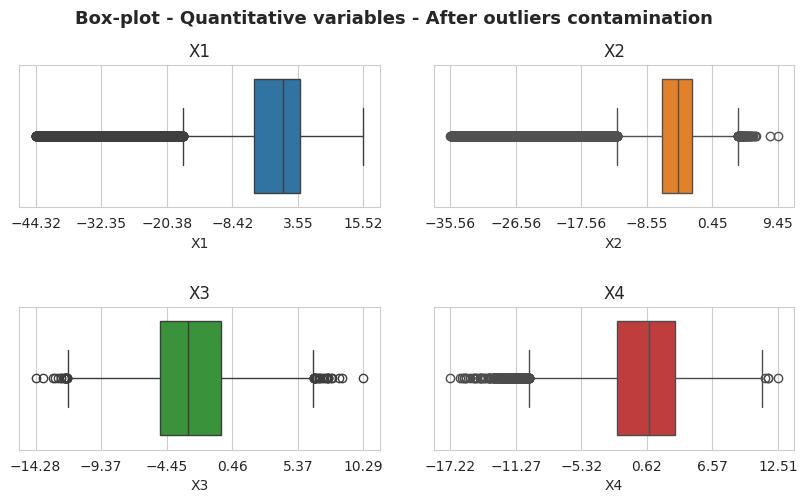

In [32]:
# Boxplot after outliers contamination
boxplot_matrix(X_pl, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - After outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)

In [33]:
# Boxplot before outliers contamination
'''
boxplot_matrix(X_not_outliers, 
               n_cols=2, 
               title='Box-plot - Quantitative variables - Before outliers contamination', 
               figsize=(10,5), 
               quant_col_names=['X1', 'X2', 'X3', 'X4'], 
               n_xticks=6, 
               title_fontsize=13, 
               save=False, 
               file_name='', 
               x_rotation=0, 
               title_height=0.99,
               style='whitegrid', 
               hspace=0.7, 
               wspace=0.15, 
               title_weight='bold',
               subtitles_fontsize=12, 
               xlabel_size=10)
'''

"\nboxplot_matrix(X_not_outliers, \n               n_cols=2, \n               title='Box-plot - Quantitative variables - Before outliers contamination', \n               figsize=(10,5), \n               quant_col_names=['X1', 'X2', 'X3', 'X4'], \n               n_xticks=6, \n               title_fontsize=13, \n               save=False, \n               file_name='', \n               x_rotation=0, \n               title_height=0.99,\n               style='whitegrid', \n               hspace=0.7, \n               wspace=0.15, \n               title_weight='bold',\n               subtitles_fontsize=12, \n               xlabel_size=10)\n"

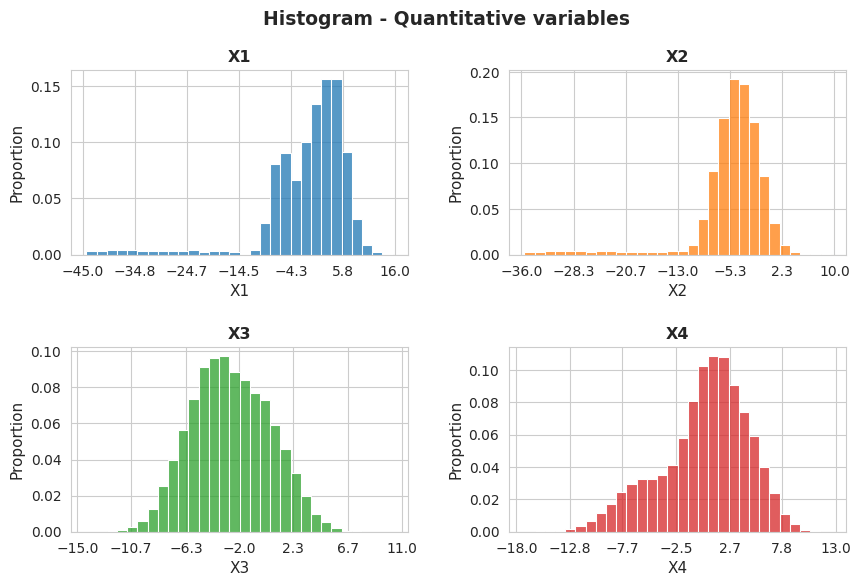

In [34]:
# Histogram
histogram_matrix(df=X_pl, bins=30, n_cols=2, title='Histogram - Quantitative variables', 
                 figsize=(10,6), quant_col_names=['X1', 'X2', 'X3', 'X4'], 
                 n_xticks=7, title_fontsize=13.5, 
                 subtitles_fontsize=11.5, save=False, file_name='', x_rotation=0, title_height=0.98,
                 style='whitegrid', hspace=0.5, wspace=0.3, n_round_xticks=1)

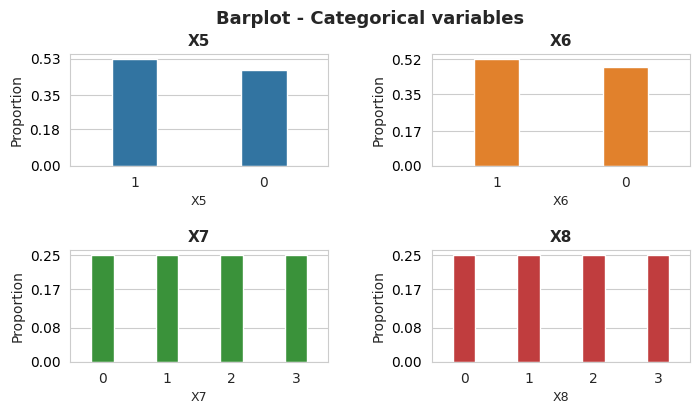

In [35]:
# Barplot
barplot_matrix(df=X_pl, n_cols=2, title='Barplot - Categorical variables', 
                 figsize=(8,4), cat_col_names=['X5', 'X6', 'X7', 'X8'], 
                 title_fontsize=13, subtitles_fontsize=11, 
                 save=False, file_name='', x_rotation=0, title_height=0.99,
                 style='whitegrid', hspace=0.75, wspace=0.4, title_weight='bold', bar_width=0.35,
                 ylabel_size=10, xlabel_size=9, xticks_size=10)

In [36]:
# Correlation Matrix
X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000,0.791927,-0.284546,-0.167647,-0.131256,-0.141723,-0.101447,-0.060432
X2,0.791927,1.000000,-0.117777,0.051606,-0.164003,-0.172118,-0.143371,0.054163
X3,-0.284546,-0.117777,1.000000,-0.044339,0.011143,0.405006,-0.120270,-0.149596
X4,-0.167647,0.051606,-0.044339,1.000000,0.199533,-0.468693,0.353659,0.534326
X5,-0.131256,-0.164003,0.011143,0.199533,1.000000,0.066579,0.736487,0.172924
X6,-0.141723,-0.172118,0.405006,-0.468693,0.066579,1.000000,-0.106847,-0.445852
X7,-0.101447,-0.143371,-0.120270,0.353659,0.736487,-0.106847,1.000000,0.320869
X8,-0.060432,0.054163,-0.149596,0.534326,0.172924,-0.445852,0.320869,1.000000


In [37]:
# Correlation Analysis
corr_matrix = X.corr().to_numpy()
n_corr = len(corr_matrix[np.triu_indices_from(corr_matrix, k=1)])
n_corr_below_30 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) < 0.30)
n_corr_above_60 = np.sum(np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) > 0.60)
n_corr_between = np.sum((np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) >= 0.30) & (np.abs(corr_matrix[np.triu_indices_from(corr_matrix, k=1)]) <= 0.60))
                        
print('Proportion of pair-wise correlation > 0.60 (in abs. value): ', np.round(n_corr_above_60 / n_corr, 2))
print('Proportion of pair-wise correlations in [0.30, 0.60]: ', np.round(n_corr_between / n_corr, 2))
print('Proportion of pair-wise correlation < 0.30 (in abs. value): ', np.round(n_corr_below_30 / n_corr, 2))

Proportion of pair-wise correlation > 0.60 (in abs. value):  0.07
Proportion of pair-wise correlations in [0.30, 0.60]:  0.21
Proportion of pair-wise correlation < 0.30 (in abs. value):  0.71


## Experiment 1: Accuracy and computation time for Fast k-medoids (section 3.2)

In [38]:
n_realizations = 1
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

In [39]:
results = {}
experiment_1_config = get_config_exp_1_sim_1()

X, y = get_simulation_1(random_state=experiment_random_state, return_outlier_idx=False)

for random_state in tqdm(random_state_list):
        
    results[random_state] = make_experiment_1(**experiment_1_config,
                                              X=X, 
                                              y=y,
                                              random_state=random_state)
    
# Time 1 realization ('frac_sample_sizes': np.array([0.0005, 0.001, 0.0025, 0.005, 0.025, 0.1, 0.25, 0.5]))
## Personal computer: 10 mins
## IBiDat Server: 5.35 mins

  0%|          | 0/1 [00:00<?, ?it/s]

frac_size: 0.0005
frac_size: 0.001
frac_size: 0.0025
frac_size: 0.005
frac_size: 0.025
frac_size: 0.1
frac_size: 0.25
frac_size: 0.5


100%|██████████| 1/1 [05:39<00:00, 339.73s/it]


In [40]:
results

{53: {'time': {0.0005: 21.55523705482483,
   0.001: 19.769005060195923,
   0.0025: 20.998809337615967,
   0.005: 22.272696018218994,
   0.025: 18.300278425216675,
   0.1: 22.910551071166992,
   0.25: 58.95244860649109,
   0.5: 153.23554730415344},
  'adj_accuracy': {0.0005: 0.8471428571428572,
   0.001: 0.8881428571428571,
   0.0025: 0.8837428571428572,
   0.005: 0.8889714285714285,
   0.025: 0.8840571428571429,
   0.1: 0.8826571428571428,
   0.25: 0.8820571428571429,
   0.5: 0.8761714285714286}}}

**TO DO: save results as pkl**

In [41]:
pivoted_results = get_pivoted_results(
    results=results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

pivoted_results

{'time': {0.0005: [21.55523705482483],
  0.001: [19.769005060195923],
  0.0025: [20.998809337615967],
  0.005: [22.272696018218994],
  0.025: [18.300278425216675],
  0.1: [22.910551071166992],
  0.25: [58.95244860649109],
  0.5: [153.23554730415344]},
 'adj_accuracy': {0.0005: [0.8471428571428572],
  0.001: [0.8881428571428571],
  0.0025: [0.8837428571428572],
  0.005: [0.8889714285714285],
  0.025: [0.8840571428571429],
  0.1: [0.8826571428571428],
  0.25: [0.8820571428571429],
  0.5: [0.8761714285714286]}}

In [42]:
avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=experiment_1_config['frac_sample_sizes']
)

avg_results

{'time': {0.0005: 21.55523705482483,
  0.001: 19.769005060195923,
  0.0025: 20.998809337615967,
  0.005: 22.272696018218994,
  0.025: 18.300278425216675,
  0.1: 22.910551071166992,
  0.25: 58.95244860649109,
  0.5: 153.23554730415344},
 'adj_accuracy': {0.0005: 0.8471428571428572,
  0.001: 0.8881428571428571,
  0.0025: 0.8837428571428572,
  0.005: 0.8889714285714285,
  0.025: 0.8840571428571429,
  0.1: 0.8826571428571428,
  0.25: 0.8820571428571429,
  0.5: 0.8761714285714286}}

In [43]:
list(avg_results['adj_accuracy'].values())

[0.8471428571428572,
 0.8881428571428571,
 0.8837428571428572,
 0.8889714285714285,
 0.8840571428571429,
 0.8826571428571428,
 0.8820571428571429,
 0.8761714285714286]

In [44]:
frac_sample_sizes_list = list(avg_results['adj_accuracy'].keys())
adj_accuracy_list = list(avg_results['adj_accuracy'].values())
time_list = list(avg_results['time'].values())
best_frac_sample_size = frac_sample_sizes_list[np.argmax(adj_accuracy_list)]

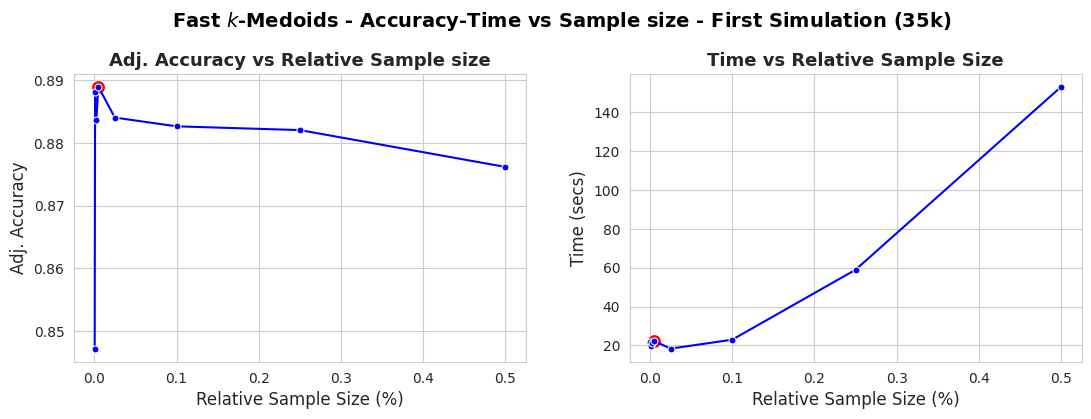

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes = axes.flatten()  

sns.lineplot(x=[best_frac_sample_size], y=[avg_results['adj_accuracy'][best_frac_sample_size]], color='red', marker='o',  markersize=10, ax=axes[0])
sns.lineplot(
    x=frac_sample_sizes_list,
    y=adj_accuracy_list, 
    color='blue', marker='o',  markersize=5, ax=axes[0]
)

sns.lineplot(x=[best_frac_sample_size], y=[avg_results['time'][best_frac_sample_size]], color='red', marker='o', markersize=10, ax=axes[1])
sns.lineplot(
    x=frac_sample_sizes_list,
    y=time_list, 
    color='blue', marker='o', markersize=5, ax=axes[1]
)

axes[0].set_title('Adj. Accuracy vs Relative Sample size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
#axes[0].set_yticks(np.round(np.linspace(np.min(best_accuracy_values), np.max(best_accuracy_values), 7),3))

axes[1].set_title('Time vs Relative Sample Size', size=13, weight='bold')
axes[1].set_ylabel('Time (secs)', size=12)
#axes[1].set_yticks(np.round(np.linspace(np.min(times_values), np.max(times_values), 7),1))

for i in range(len(axes)):
    #axes[i].set_xticks(np.round(np.linspace(np.min(data_perc_sizes), np.max(data_perc_sizes), 7),1))
    axes[i].set_xlabel('Relative Sample Size (%)', size=12)


#plt.tight_layout()
plt.subplots_adjust(top=0.83)
plt.suptitle('Fast $k$-Medoids - Accuracy-Time vs Sample size - First Simulation (35k)', fontsize=14, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

file_name = 'plots/kmedoids_simulation_1_acc_time_v2'
#fig.savefig(file_name + '.png', format='png', dpi=200)

plt.show()

In [79]:
print(best_frac_sample_size)

0.1


**TO DO: save plot as png**

**TO DO: repetir experimento 1 con más valores para el iterable, por ahora se usó un set de prueba**


## Experiment 3: Accuracy, computation time and number of folds for q-Fold Fast k-medoids (section 3.4)

In [46]:
n_realizations = 1
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

In [47]:
results = {}
experiment_3_config = get_config_exp_3_sim_1()

X, y = get_simulation_1(random_state=experiment_random_state, return_outlier_idx=False)

for random_state in tqdm(random_state_list):
        
    results[random_state] = make_experiment_3(**experiment_3_config,
                                              X=X, 
                                              y=y,
                                              random_state=random_state)
    
# Time 1 realization ('n_splits': np.array([5, 10, 20, 30, 40]), 'frac_sample_sizes': np.array([0.005, 0.02, 0.05, 0.1, 0.25]))
## Personal computer: 21 mins
## IBiDat Server: 12 mins

  0%|          | 0/1 [00:00<?, ?it/s]

n_splits: 5
frac_size: 0.005


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


frac_size: 0.02


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


frac_size: 0.05


Clustering Folds: 100%|██████████| 5/5 [00:20<00:00,  4.09s/it]


frac_size: 0.1


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]


frac_size: 0.25


Clustering Folds: 100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


n_splits: 10
frac_size: 0.005


Clustering Folds: 100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


frac_size: 0.02


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]


frac_size: 0.05


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it]


frac_size: 0.1


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


frac_size: 0.25


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


n_splits: 20
frac_size: 0.005


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


frac_size: 0.02


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.50s/it]


frac_size: 0.05


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


frac_size: 0.1


Clustering Folds: 100%|██████████| 20/20 [00:29<00:00,  1.46s/it]


frac_size: 0.25


Clustering Folds: 100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


n_splits: 30
frac_size: 0.005


Clustering Folds: 100%|██████████| 30/30 [00:35<00:00,  1.20s/it]


frac_size: 0.02


Clustering Folds: 100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


frac_size: 0.05


Clustering Folds: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


frac_size: 0.1


Clustering Folds: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


frac_size: 0.25


Clustering Folds: 100%|██████████| 30/30 [00:30<00:00,  1.03s/it]


n_splits: 40
frac_size: 0.005


Clustering Folds: 100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


frac_size: 0.02


Clustering Folds: 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


frac_size: 0.05


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_size: 0.1


Clustering Folds: 100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


frac_size: 0.25


100%|██████████| 1/1 [12:02<00:00, 722.28s/it]


**TO DO: save results as pkl**

In [48]:
results

{53: {'time': {5: {0.005: 21.976451873779297,
    0.02: 21.559539794921875,
    0.05: 21.114984035491943,
    0.1: 18.73669123649597,
    0.25: 22.193378686904907},
   10: {0.005: 24.43256425857544,
    0.02: 21.753504753112793,
    0.05: 20.97177529335022,
    0.1: 20.102980613708496,
    0.25: 22.17181086540222},
   20: {0.005: 26.6651291847229,
    0.02: 30.304835081100464,
    0.05: 29.854639768600464,
    0.1: 29.54866337776184,
    0.25: 27.384927988052368},
   30: {0.005: 36.316938161849976,
    0.02: 34.59625482559204,
    0.05: 34.42872714996338,
    0.1: 31.925880193710327,
    0.25: 31.415699243545532},
   40: {0.005: 39.10580563545227,
    0.02: 40.49830341339111,
    0.05: 37.621339559555054,
    0.1: 37.62183976173401,
    0.25: 34.86609864234924}},
  'adj_accuracy': {5: {0.005: 0.7323142857142857,
    0.02: 0.8713714285714286,
    0.05: 0.8352,
    0.1: 0.8778571428571429,
    0.25: 0.8797714285714285},
   10: {0.005: 0.8182857142857143,
    0.02: 0.8640285714285715,
   

In [49]:
pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

pivoted_results

{'time': {5: {0.005: [21.976451873779297],
   0.02: [21.559539794921875],
   0.05: [21.114984035491943],
   0.1: [18.73669123649597],
   0.25: [22.193378686904907]},
  10: {0.005: [24.43256425857544],
   0.02: [21.753504753112793],
   0.05: [20.97177529335022],
   0.1: [20.102980613708496],
   0.25: [22.17181086540222]},
  20: {0.005: [26.6651291847229],
   0.02: [30.304835081100464],
   0.05: [29.854639768600464],
   0.1: [29.54866337776184],
   0.25: [27.384927988052368]},
  30: {0.005: [36.316938161849976],
   0.02: [34.59625482559204],
   0.05: [34.42872714996338],
   0.1: [31.925880193710327],
   0.25: [31.415699243545532]},
  40: {0.005: [39.10580563545227],
   0.02: [40.49830341339111],
   0.05: [37.621339559555054],
   0.1: [37.62183976173401],
   0.25: [34.86609864234924]}},
 'adj_accuracy': {5: {0.005: [0.7323142857142857],
   0.02: [0.8713714285714286],
   0.05: [0.8352],
   0.1: [0.8778571428571429],
   0.25: [0.8797714285714285]},
  10: {0.005: [0.8182857142857143],
   0.0

In [50]:
avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                   iterable1 = experiment_3_config['n_splits'], 
                                  iterable2 = experiment_3_config['frac_sample_sizes'])

avg_results

{'time': {5: {0.005: 21.976451873779297,
   0.02: 21.559539794921875,
   0.05: 21.114984035491943,
   0.1: 18.73669123649597,
   0.25: 22.193378686904907},
  10: {0.005: 24.43256425857544,
   0.02: 21.753504753112793,
   0.05: 20.97177529335022,
   0.1: 20.102980613708496,
   0.25: 22.17181086540222},
  20: {0.005: 26.6651291847229,
   0.02: 30.304835081100464,
   0.05: 29.854639768600464,
   0.1: 29.54866337776184,
   0.25: 27.384927988052368},
  30: {0.005: 36.316938161849976,
   0.02: 34.59625482559204,
   0.05: 34.42872714996338,
   0.1: 31.925880193710327,
   0.25: 31.415699243545532},
  40: {0.005: 39.10580563545227,
   0.02: 40.49830341339111,
   0.05: 37.621339559555054,
   0.1: 37.62183976173401,
   0.25: 34.86609864234924}},
 'adj_accuracy': {5: {0.005: 0.7323142857142857,
   0.02: 0.8713714285714286,
   0.05: 0.8352,
   0.1: 0.8778571428571429,
   0.25: 0.8797714285714285},
  10: {0.005: 0.8182857142857143,
   0.02: 0.8640285714285715,
   0.05: 0.8805714285714286,
   0.1: 0.

In [51]:
dfs = avg_results_to_dfs(avg_results)

In [54]:
dfs['adj_accuracy']

,n_splits,frac_sample_sizes,adj_accuracy
0,5,0.005,0.732314
1,5,0.020,0.871371
2,5,0.050,0.835200
3,5,0.100,0.877857
4,5,0.250,0.879771
5,10,0.005,0.818286
6,10,0.020,0.864029
7,10,0.050,0.880571
8,10,0.100,0.881314
9,10,0.250,0.880971


In [55]:
dfs['time']

,n_splits,frac_sample_sizes,time
0,5,0.005,21.976452
1,5,0.020,21.559540
2,5,0.050,21.114984
3,5,0.100,18.736691
4,5,0.250,22.193379
5,10,0.005,24.432564
6,10,0.020,21.753505
7,10,0.050,20.971775
8,10,0.100,20.102981
9,10,0.250,22.171811


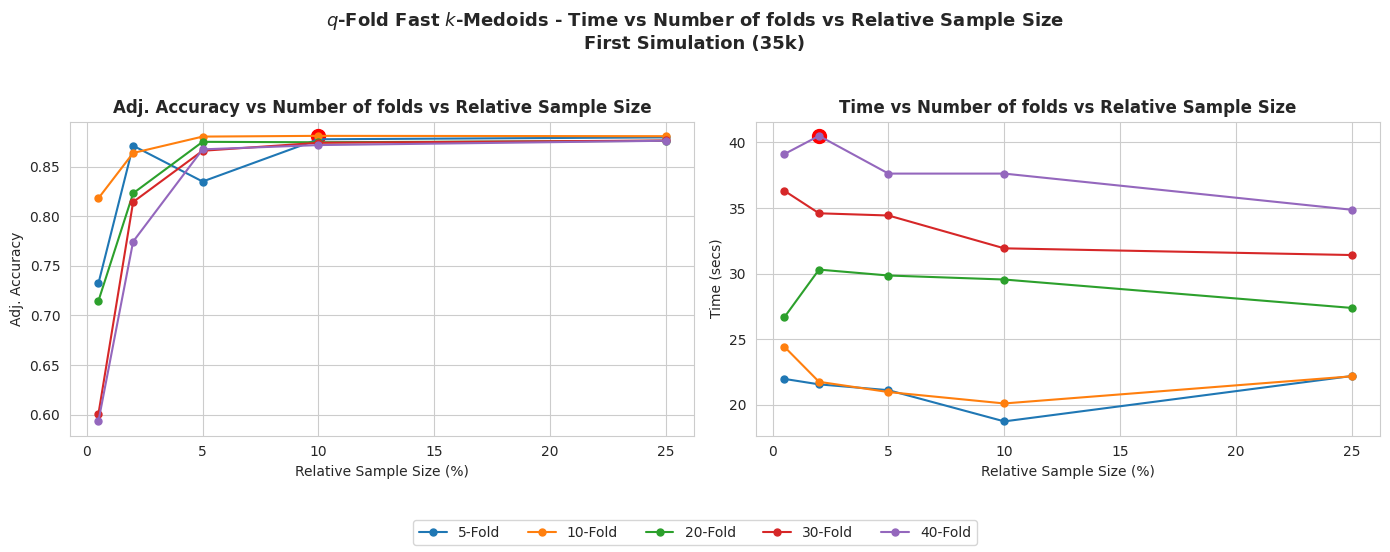

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

best_combi_acc = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]
best_combi_time = dfs['time'].sort_values(by='time', ascending=False).iloc[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5.5), sharex=True)

# Primer subplot: Accuracy
ax1 = axes[0]
ax1.plot(best_combi_acc['frac_sample_sizes'] * 100, best_combi_acc['adj_accuracy'], marker='o', markersize=10, color='red')
for k1 in sorted(dfs['adj_accuracy']['n_splits'].unique()):
    subset = dfs['adj_accuracy'][dfs['adj_accuracy']['n_splits'] == k1]
    ax1.plot(subset['frac_sample_sizes'] * 100, subset['adj_accuracy'], marker='o', markersize=5, label=f"{k1}-Fold")
ax1.set_title("Adj. Accuracy vs Number of folds vs Relative Sample Size", fontsize=12, fontweight='bold')
ax1.set_xlabel("Relative Sample Size (%)")
ax1.set_ylabel("Adj. Accuracy")

# Segundo subplot: Time
ax2 = axes[1]
ax2.plot(best_combi_time['frac_sample_sizes'] * 100, best_combi_time['time'], marker='o', markersize=10, color='red')
for k1 in sorted(dfs['time']['n_splits'].unique()):
    subset = dfs['time'][dfs['time']['n_splits'] == k1]
    ax2.plot(subset['frac_sample_sizes'] * 100, subset['time'], marker='o', markersize=5, label=f"{k1}-Fold")
ax2.set_title("Time vs Number of folds vs Relative Sample Size", fontsize=12, fontweight='bold')
ax2.set_xlabel("Relative Sample Size (%)")
ax2.set_ylabel("Time (secs)")

# Título general
fig.suptitle("$q$-Fold Fast $k$-Medoids - Time vs Number of folds vs Relative Sample Size\nFirst Simulation (35k)", fontsize=13, fontweight='bold')

# Leyenda común abajo
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


In [85]:
best_frac_sample_size = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]['frac_sample_sizes']
best_n_splits = dfs['adj_accuracy'].sort_values(by='adj_accuracy', ascending=False).iloc[0]['n_splits']
n = len(X)
split_ratio = np.round((best_n_splits/n)*100,3) # best_split = split_ratio * n

print(' split_ratio', split_ratio, '\n', 'best_n_splits', best_n_splits, '\n', 'best_frac_sample_size', best_frac_sample_size)

 split_ratio 0.029 
 best_n_splits 10.0 
 best_frac_sample_size 0.1


**TO DO: save plot as png**

## Experiment 4: Empirical comparison to other existing algorithms (section 3.5)

In [4]:
n_realizations = 1
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

In [5]:
experiment_4_config = get_config_exp_4_sim_1()

In [6]:
quant_distances_names = ['robust_mahalanobis']
binary_distances_names = ['jaccard', 'sokal']
multiclass_distances_names = ['hamming']
robust_method = ['MAD', 'trimmed', 'winsorized']

GGower_distances_names = get_GGower_distances_names(quant_distances_names, binary_distances_names, multiclass_distances_names, robust_method)

In [7]:
from sklearn.cluster import KMeans
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower

#################################################################################################

models = {
    
    'KMeans': KMeans(
        n_clusters=experiment_4_config['n_clusters'], 
        random_state=experiment_random_state, 
        init='k-means++', 
        n_init='auto', 
        max_iter=300),

# TODO: añadir resto de competidores 

}

#################################################################################################

for d in GGower_distances_names:

    d1, d2, d3 = d.split('-')

    if 'robust' in d1:
        r = d1.split('_')[-1]
        d1 = '_'.join(d1.split('_')[:2])
        
    models[f'FastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_4_config['random_state'],
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1='robust_mahalanobis', 
            d2='jaccard', 
            d3='hamming', 
            robust_method='MAD', 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples']) 

    models[f'FoldFastKmedoidsGGower-{d1}_{r}-{d2}-{d3}'] = FoldFastKmedoidsGGower(
            n_clusters=experiment_4_config['n_clusters'], 
            method=experiment_4_config['method'], 
            init=experiment_4_config['init'], 
            max_iter=experiment_4_config['max_iter'], 
            random_state=experiment_random_state,
            frac_sample_size=experiment_4_config['frac_sample_size'], 
            p1=experiment_4_config['p1'], 
            p2=experiment_4_config['p2'], 
            p3=experiment_4_config['p3'], 
            d1='robust_mahalanobis', 
            d2='jaccard', 
            d3='hamming', 
            robust_method='MAD', 
            alpha=experiment_4_config['alpha'], 
            epsilon=experiment_4_config['epsilon'], 
            n_iters=experiment_4_config['n_iters'],
            VG_sample_size=experiment_4_config['VG_sample_size'], 
            VG_n_samples=experiment_4_config['VG_n_samples'],
            n_splits=experiment_4_config['n_splits'], 
            shuffle=experiment_4_config['shuffle'], 
            kfold_random_state=experiment_4_config['kfold_random_state']) 

**TO DO: añadir resto de modelos competidores**

In [8]:
models

{'KMeans': KMeans(n_clusters=4, random_state=123),
 'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': <FastKmedoids.models.FastKmedoidsGGower at 0x7f095e7c8800>,
 'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': <FastKmedoids.models.FoldFastKmedoidsGGower at 0x7f095e45ecc0>,
 'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': <FastKmedoids.models.FastKmedoidsGGower at 0x7f095e7c8680>,
 'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': <FastKmedoids.models.FoldFastKmedoidsGGower at 0x7f095e207740>,
 'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': <FastKmedoids.models.FastKmedoidsGGower at 0x7f095e2076e0>,
 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': <FastKmedoids.models.FoldFastKmedoidsGGower at 0x7f096058a990>,
 'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': <FastKmedoids.models.FastKmedoidsGGower at 0x7f0abacf3770>,
 'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sok

In [9]:
results = {}

for random_state in random_state_list:
    
    X, y = get_simulation_1(random_state=random_state, return_outlier_idx=False)

    results[random_state] = make_experiment_4(X=X, y=y, models=models)

# Time 1 realization: 
## Personal computer: 
## IBiDat Server: 4 mins (FALTA AÑADI RESTO DE MODELOS COMPETIDORES)

KMeans
FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming


Clustering Folds: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming


Clustering Folds: 100%|██████████| 10/10 [00:20<00:00,  2.10s/it]


FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming


Clustering Folds: 100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming


Clustering Folds: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


In [10]:
results

{53: {'time': {'KMeans': 1.108708143234253,
   'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 17.155037879943848,
   'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 22.086068868637085,
   'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 23.36650252342224,
   'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 19.82329225540161,
   'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 22.843738555908203,
   'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 21.34460473060608,
   'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 22.12316918373108,
   'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 21.347399950027466,
   'FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 21.15606713294983,
   'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 22.74045491218567,
   'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': 24.01206493

**TO DO: save results as pkl**

In [11]:
model_names = list(models.keys())

pivoted_results = get_pivoted_results(
    results=results, 
    iterable=model_names
)

pivoted_results

{'time': {'KMeans': [1.108708143234253],
  'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': [17.155037879943848],
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': [22.086068868637085],
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': [23.36650252342224],
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': [19.82329225540161],
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': [22.843738555908203],
  'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': [21.34460473060608],
  'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': [22.12316918373108],
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': [21.347399950027466],
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': [21.15606713294983],
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': [22.74045491218567],
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': [24.0

In [12]:
avg_results = get_avg_results(
    results=results, 
    pivoted_results=pivoted_results, 
    iterable=model_names
)

avg_results

{'time': {'KMeans': 1.108708143234253,
  'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 17.155037879943848,
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 22.086068868637085,
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 23.36650252342224,
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 19.82329225540161,
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 22.843738555908203,
  'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 21.34460473060608,
  'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 22.12316918373108,
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 21.347399950027466,
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 21.15606713294983,
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 22.74045491218567,
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': 24.012064933776855,
  'Fold

**TO DO: comparative plot**

In [14]:
avg_results

{'time': {'KMeans': 1.108708143234253,
  'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 17.155037879943848,
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 22.086068868637085,
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 23.36650252342224,
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 19.82329225540161,
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 22.843738555908203,
  'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 21.34460473060608,
  'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 22.12316918373108,
  'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 21.347399950027466,
  'FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 21.15606713294983,
  'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 22.74045491218567,
  'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': 24.012064933776855,
  'Fold

In [ ]:
avg_results['adj_accuracy'].keys()

{'KMeans': 0.7216571428571429,
 'FastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-jaccard-hamming': 0.8209142857142857,
 'FastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-jaccard-hamming': 0.8209142857142857,
 'FastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-jaccard-hamming': 0.8209142857142857,
 'FastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGGower-robust_mahalanobis_MAD-sokal-hamming': 0.8209142857142857,
 'FastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGGower-robust_mahalanobis_trimmed-sokal-hamming': 0.8209142857142857,
 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': 0.7716857142857143,
 'FoldFastKmedoidsGG

In [39]:
model_names = np.array(list(avg_results['adj_accuracy'].keys()))
avg_adj_accuracy = np.array(list(avg_results['adj_accuracy'].values()))
avg_ari = np.array(list(avg_results['ARI'].values()))
avg_time = np.array(list(avg_results['time'].values()))
idx_sorted = np.argsort(-avg_adj_accuracy)


our_methods_1 = [x for x in model_names if 'Fast' in x and 'Fold' not in x] # Fast k-medoids
our_methods_2 = [x for x in model_names if 'Fast' in x and 'Fold' in x] # q-Fold Fast k-medoids
other_methods = [x for x in model_names if x not in our_methods_1 + our_methods_2 and x not in not_feasible_methods]
not_feasible_methods = ['DipInit', 'Spectral-Clustering'] # based on previous experiments

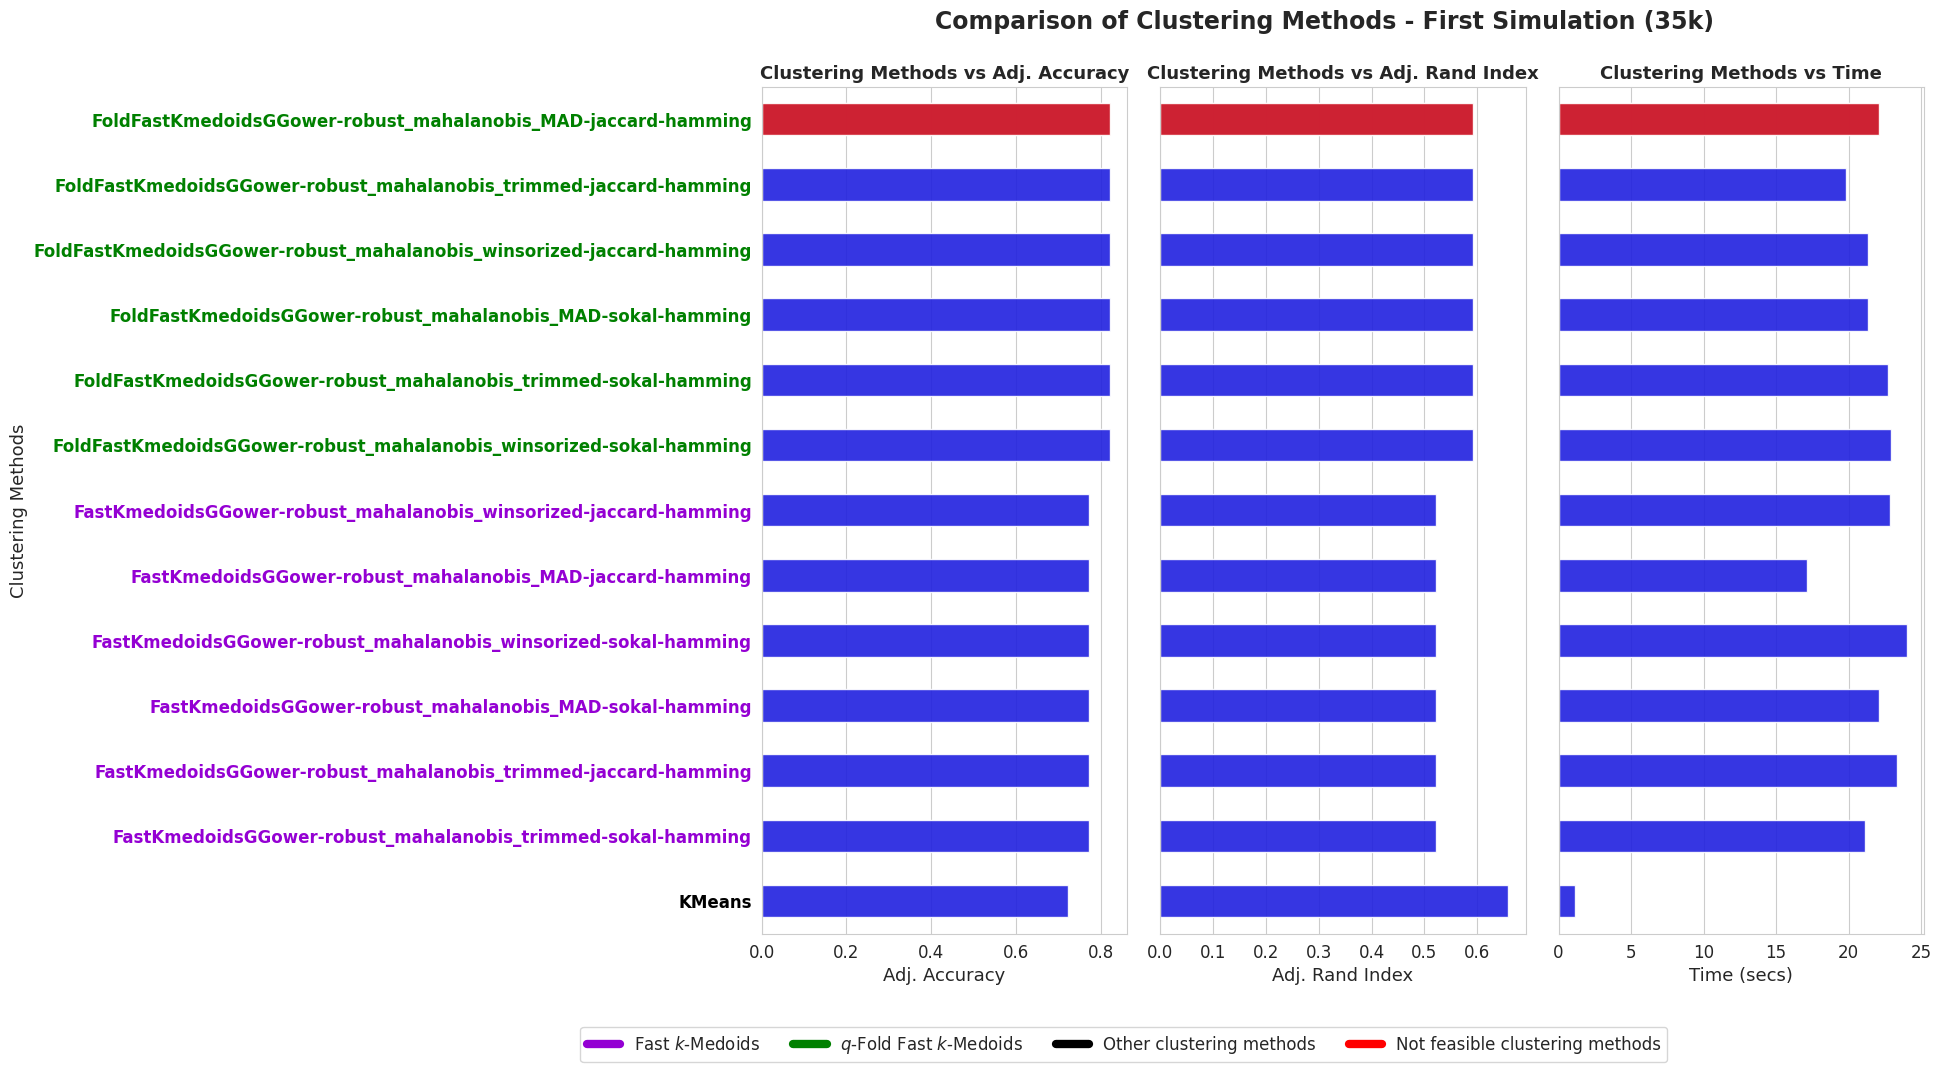

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,11))
axes = axes.flatten()

ax = sns.barplot(x=avg_adj_accuracy[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[0])
ax = sns.barplot(x=[avg_adj_accuracy[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[0])

ax = sns.barplot(x=avg_ari[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[1])
ax = sns.barplot(x=[avg_ari[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[1])

ax = sns.barplot(x=avg_time[idx_sorted], y=model_names[idx_sorted], color='blue', width=0.5, alpha=0.9, ax=axes[2])
ax = sns.barplot(x=[avg_time[idx_sorted[0]]], y=[model_names[idx_sorted[0]]], color='red', width=0.5, alpha=0.9, ax=axes[2])

axes[0].set_ylabel('Clustering Methods', size=13)
axes[0].set_xlabel('Adj. Accuracy', size=13)
#axes[0].set_xticks(np.round(np.linspace(0, np.max(accuracy_list), 7),2)) 
axes[0].tick_params(axis='y', labelsize=12)    
axes[0].tick_params(axis='x', labelsize=12)  
axes[0].set_title('Clustering Methods vs Adj. Accuracy', size=13, weight='bold')

axes[1].set_xlabel('Adj. Rand Index', size=13)
#axes[1].set_xticks(np.round(np.linspace(0, np.max(adj_rand_index_list), 7),2)) 
axes[1].tick_params(axis='x', labelsize=12)  
axes[1].set_title('Clustering Methods vs Adj. Rand Index', size=13, weight='bold')
axes[1].set_yticklabels([])

axes[2].set_xlabel('Time (secs)', size=13)
#axes[2].set_xticks(np.round(np.linspace(0, np.max(time_list), 7),2)) 
axes[2].tick_params(axis='x', labelsize=12)  
axes[2].set_title('Clustering Methods vs Time', size=13, weight='bold')
axes[2].set_yticklabels([])

for label in axes[0].get_yticklabels():
    if label.get_text() in our_methods_1:
        label.set_weight('bold')
        label.set_color('darkviolet') 
    elif label.get_text() in our_methods_2:
        label.set_weight('bold')
        label.set_color('green') 
    elif label.get_text() in other_methods:
        label.set_weight('bold')
        label.set_color('black') 
    elif label.get_text() in not_feasible_methods:
        label.set_weight('bold')
        label.set_color('red') 

# Create legend elements
legend_elements = [
    plt.Line2D([0], [0], color='darkviolet', lw=6, label='Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='green', lw=6, label='$q$-Fold Fast $k$-Medoids'),
    plt.Line2D([0], [0], color='black', lw=6, label='Other clustering methods'),
    plt.Line2D([0], [0], color='red', lw=6, label='Not feasible clustering methods')
]

# Add legend to the figure
axes[0].legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(2.5, -0.1), ncol=len(legend_elements), fontsize=12)

plt.suptitle("Comparison of Clustering Methods - First Simulation (35k)", fontsize=17, weight='bold', y=0.95)
plt.subplots_adjust(hspace=0, wspace=0.09) 
file_name = 'plots/kmedoids_simulation_1_comparison_v2'
#fig.savefig(file_name + '.png', format='png', dpi=200, bbox_inches="tight", pad_inches=0.2)
plt.show()